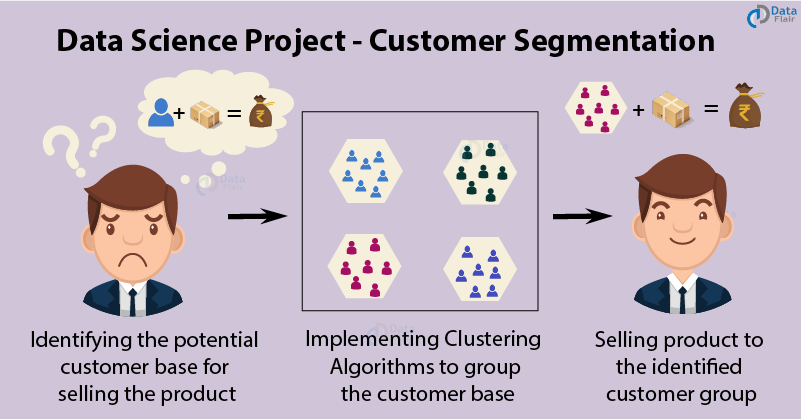

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", palette=None,rc={'figure.figsize':(11.7,8.27)})

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
import scipy.cluster.hierarchy as sch

from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

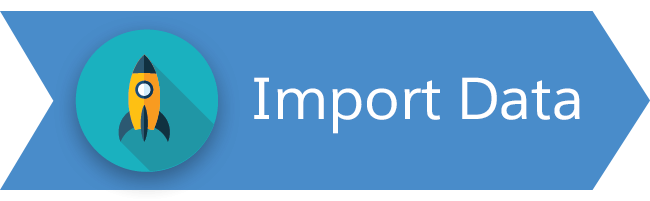

In [2]:
data = pd.read_csv("/kaggle/input/mall-customers-dataset/Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


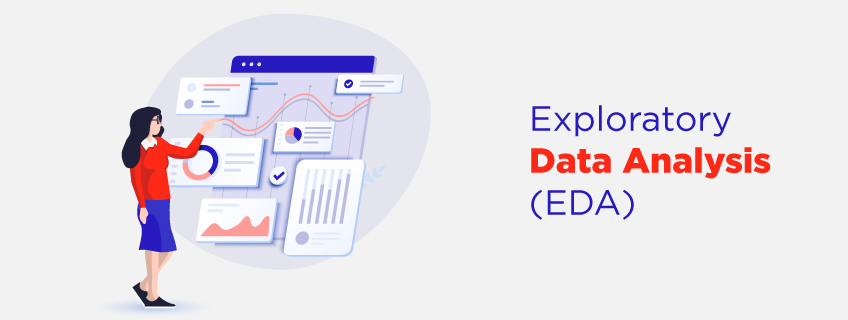

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


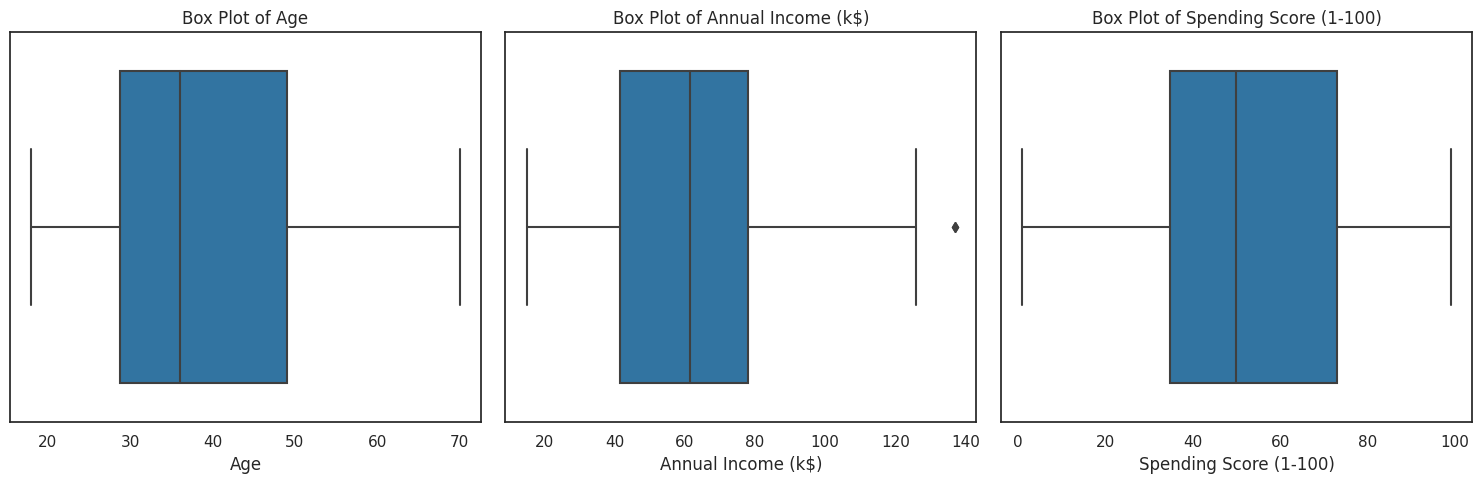

In [5]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=data, x="Age")
plt.title('Box Plot of Age')

plt.subplot(1, 3, 2)
sns.boxplot(data=data, x="Annual Income (k$)")
plt.title('Box Plot of Annual Income (k$)')

plt.subplot(1, 3, 3)
sns.boxplot(data=data, x="Spending Score (1-100)")
plt.title('Box Plot of Spending Score (1-100)')

plt.tight_layout()
plt.show()


In [6]:
data.describe(include="object").T

,count,unique,top,freq
Genre,200,2,Female,112


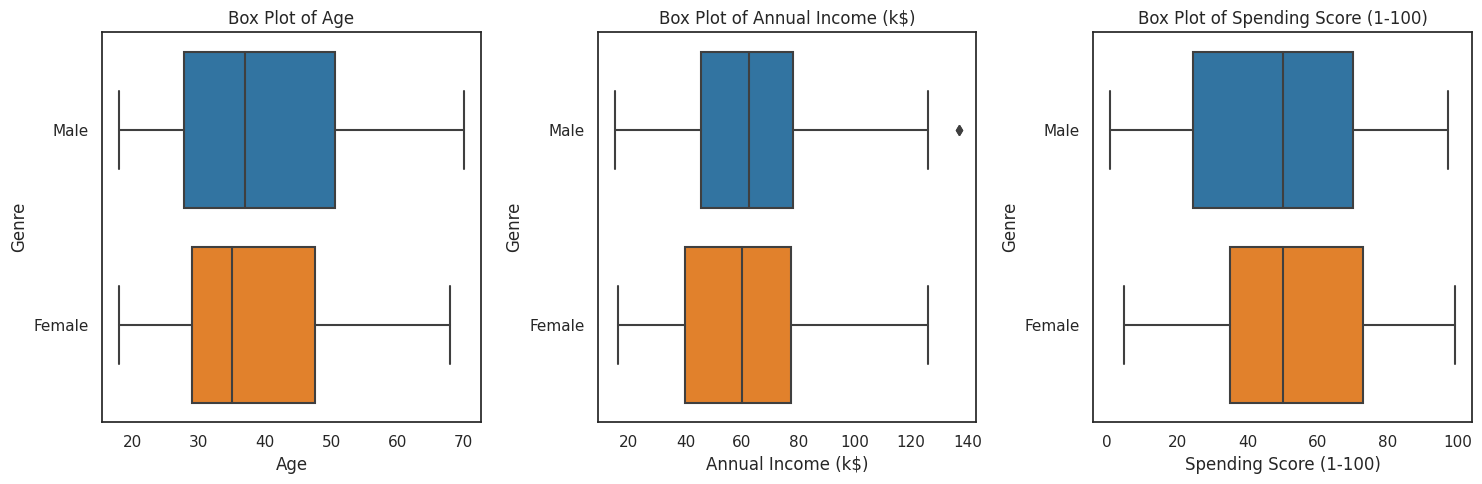

In [7]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=data, x="Age", y="Genre")
plt.title('Box Plot of Age')

plt.subplot(1, 3, 2)
sns.boxplot(data=data, x="Annual Income (k$)", y="Genre")
plt.title('Box Plot of Annual Income (k$)')

plt.subplot(1, 3, 3)
sns.boxplot(data=data, x="Spending Score (1-100)", y="Genre")
plt.title('Box Plot of Spending Score (1-100)')

plt.tight_layout()
plt.show()


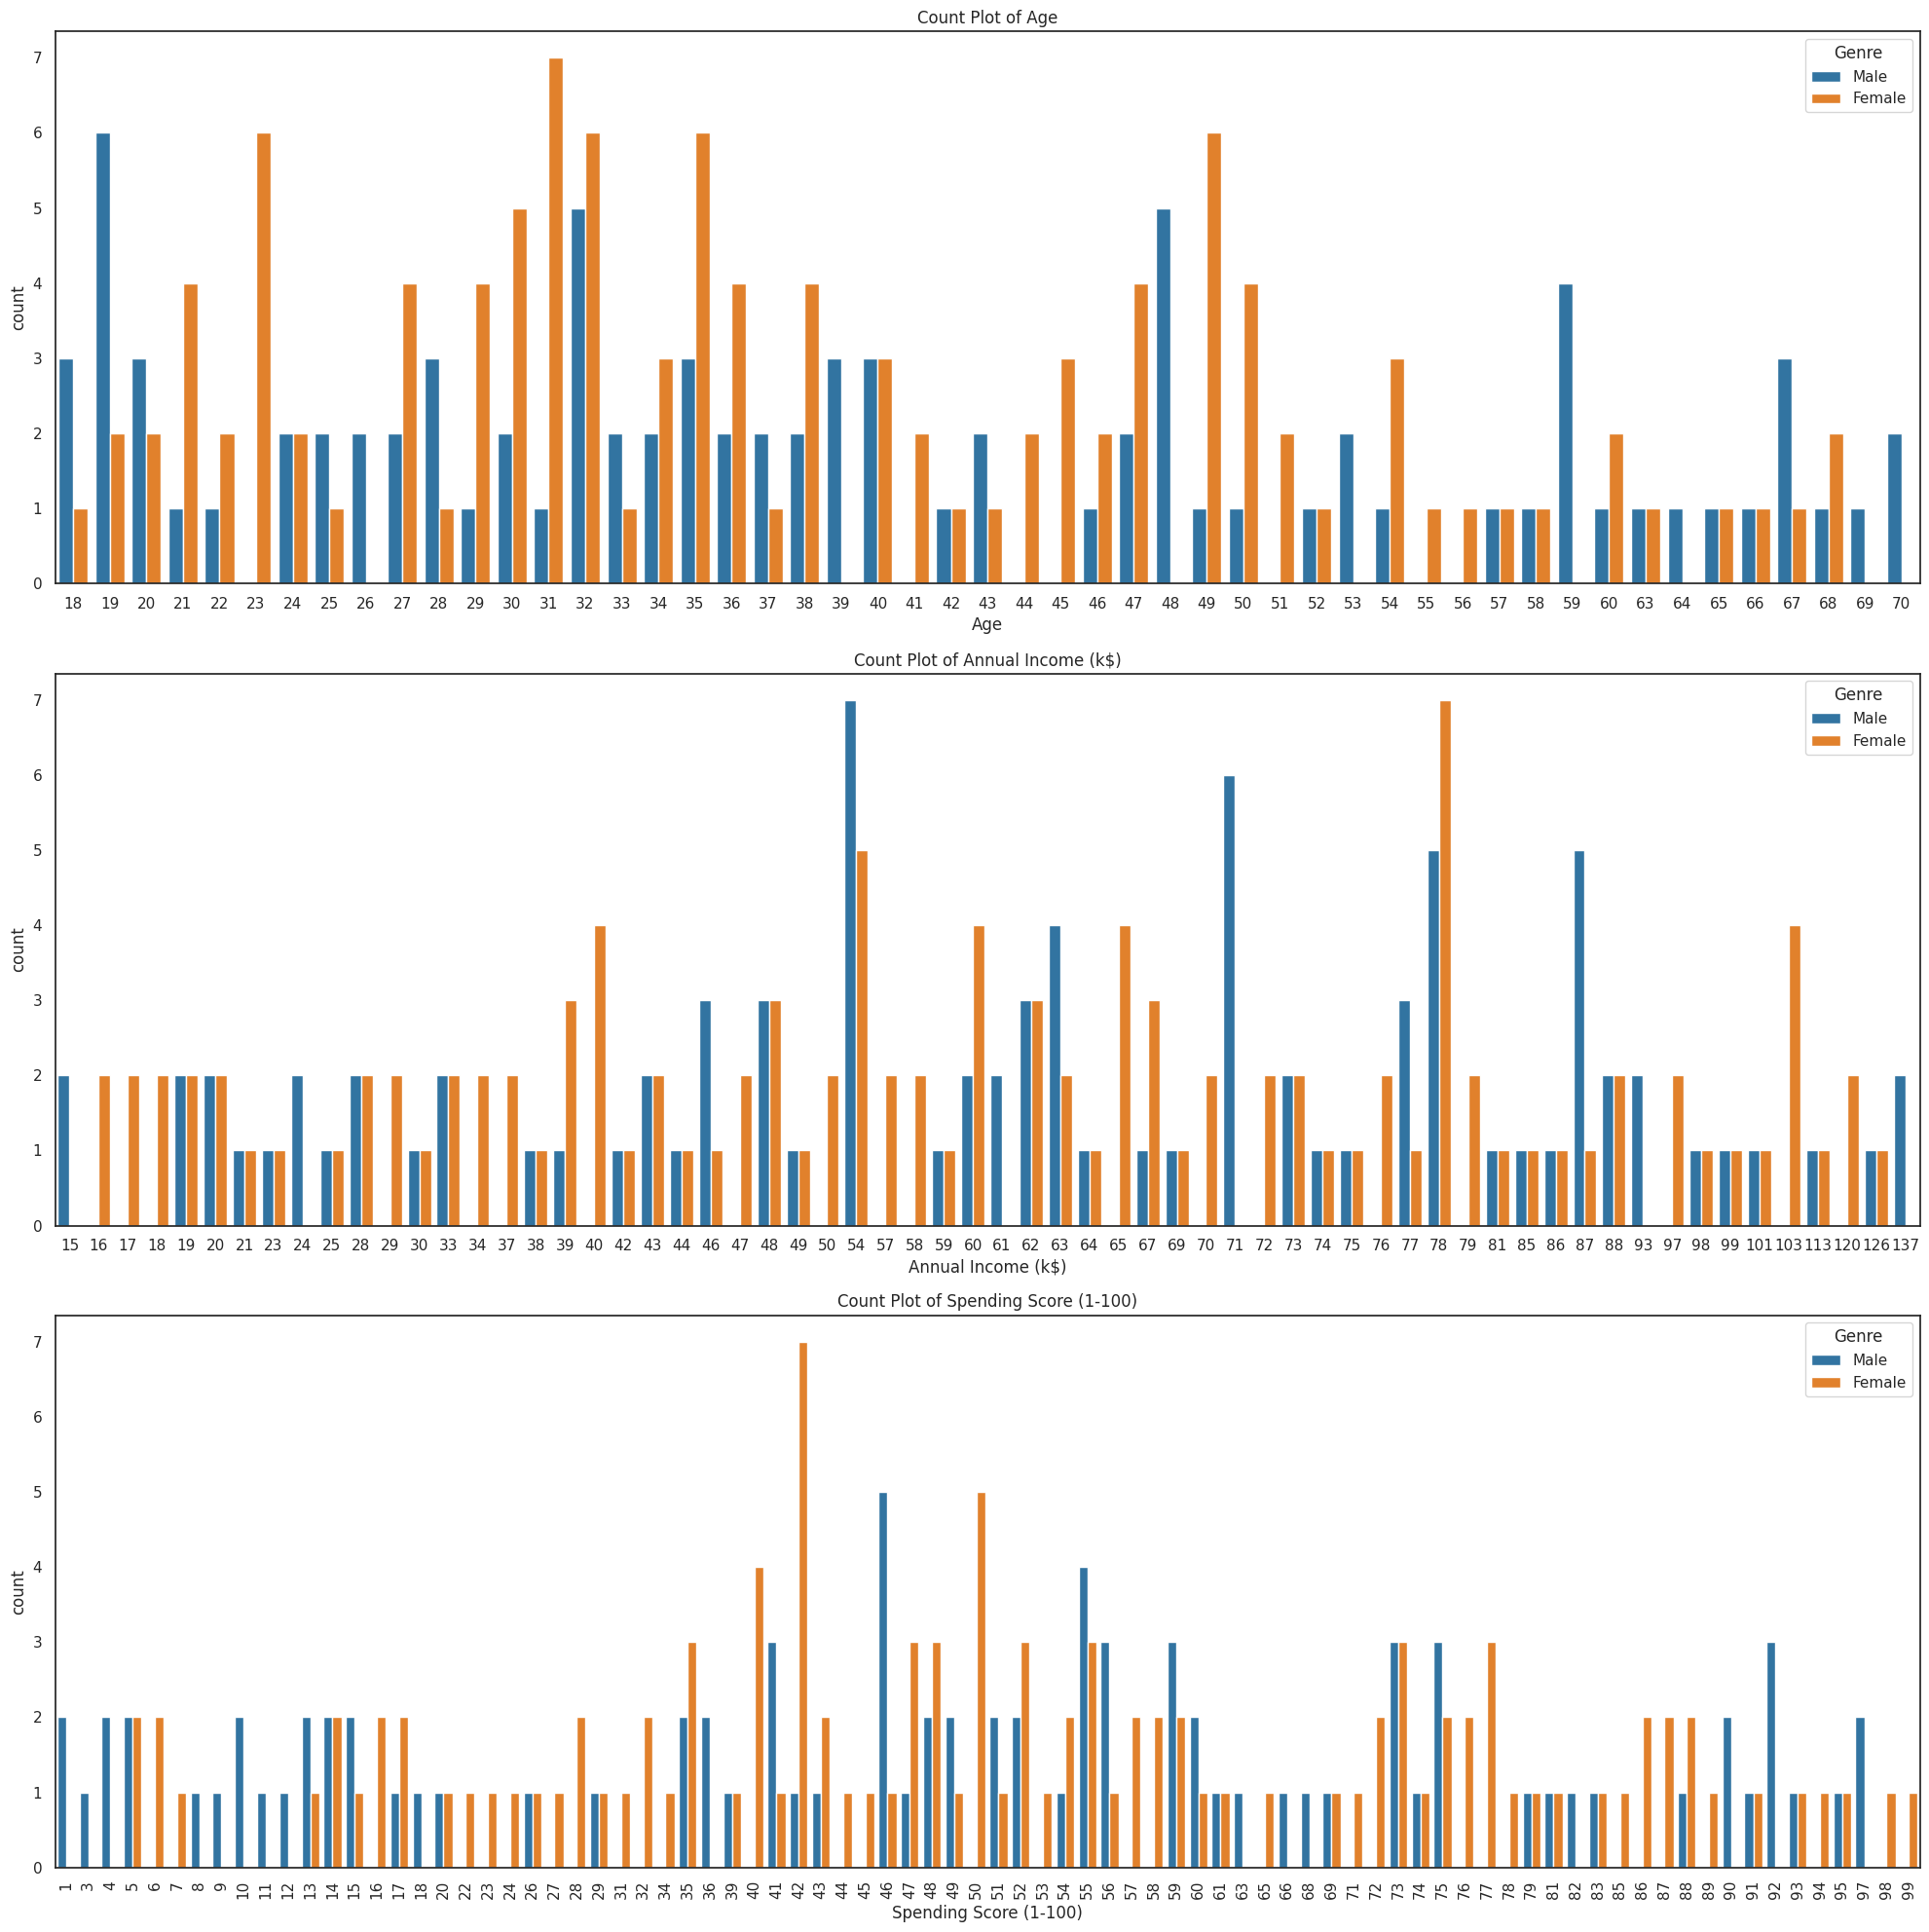

In [8]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 1, 1)
sns.countplot(data=data, x="Age", hue="Genre")
plt.title('Count Plot of Age')

plt.subplot(3, 1, 2)
sns.countplot(data=data, x="Annual Income (k$)", hue="Genre")
plt.title('Count Plot of Annual Income (k$)')

plt.subplot(3, 1, 3)
sns.countplot(data=data, x="Spending Score (1-100)", hue="Genre")
plt.title('Count Plot of Spending Score (1-100)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [9]:
data.Genre.value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

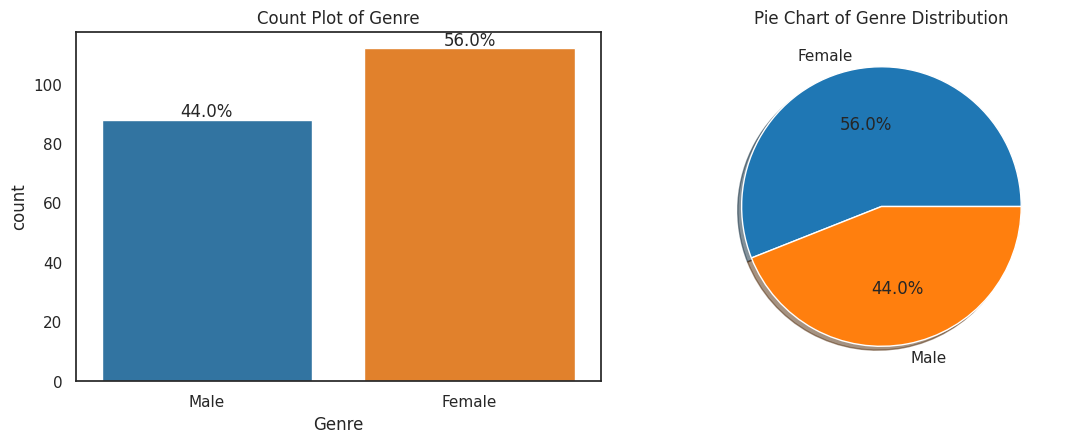

In [10]:
plt.subplot(2, 2, 1)
ax = sns.countplot(data=data, x="Genre")
plt.title('Count Plot of Genre')


total = len(data)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    ax.text(p.get_x() + p.get_width() / 2, height + 1, percentage, ha='center')


plt.subplot(2, 2, 2)
plt.pie(x=data.Genre.value_counts().values, labels=data.Genre.value_counts().index, shadow=True, autopct="%1.1f%%")
plt.title('Pie Chart of Genre Distribution')

plt.tight_layout()
plt.show()


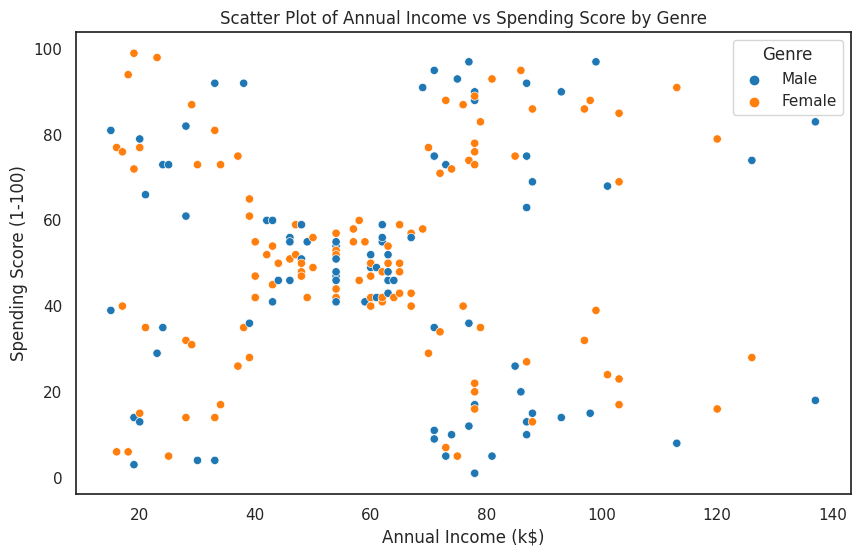

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Genre")
plt.title('Scatter Plot of Annual Income vs Spending Score by Genre')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.show()


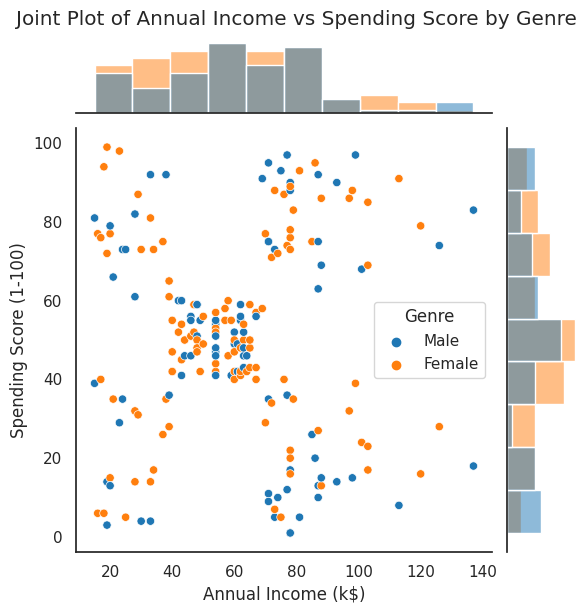

In [12]:
g = sns.JointGrid(data=data, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Genre")
g.plot(sns.scatterplot, sns.histplot)

plt.suptitle('Joint Plot of Annual Income vs Spending Score by Genre', y=1.02)

plt.show()


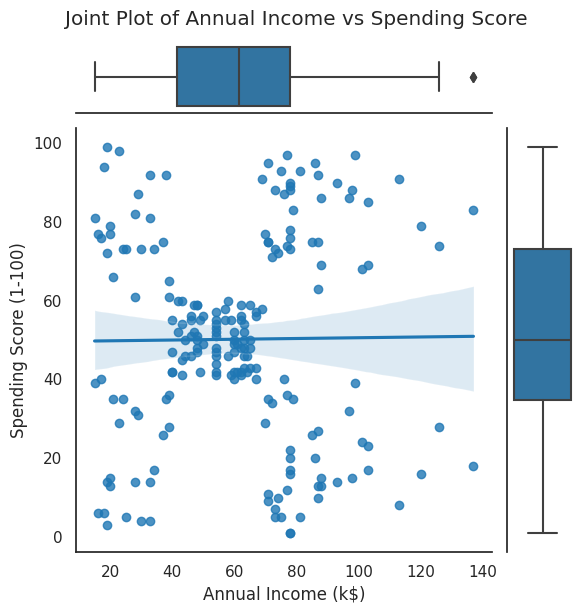

In [13]:
g = sns.JointGrid(data=data, x="Annual Income (k$)", y="Spending Score (1-100)")
g.plot(sns.regplot, sns.boxplot)
plt.suptitle('Joint Plot of Annual Income vs Spending Score', y=1.02)

plt.show()

In [14]:
data.duplicated().sum()

0

In [15]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
data.drop(["CustomerID"],axis=1,inplace=True)

In [17]:
le=LabelEncoder()
data["Genre"]=le.fit_transform(data["Genre"])

In [18]:
data.loc[data["Age"]<=19,"Age"]=0
data.loc[(data["Age"]>19) & (data["Age"]<=25),"Age"]=1
data.loc[(data["Age"]>26) & (data["Age"]<=45),"Age"]=2
data.loc[(data["Age"]>45) & (data["Age"]<=60),"Age"]=3
data.loc[data["Age"]>60,"Age"]=4
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,15,39
1,1,1,15,81
2,0,1,16,6
3,0,1,16,77
4,0,2,17,40


In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Genre,200.0,0.440,0.497633,0.0,0.00,0.0,1.0,1.0
Age,200.0,2.405,2.565910,0.0,2.00,2.0,3.0,26.0
Annual Income (k$),200.0,60.560,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.200,25.823522,1.0,34.75,50.0,73.0,99.0


In [20]:
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,15,39
1,1,1,15,81
2,0,1,16,6
3,0,1,16,77
4,0,2,17,40


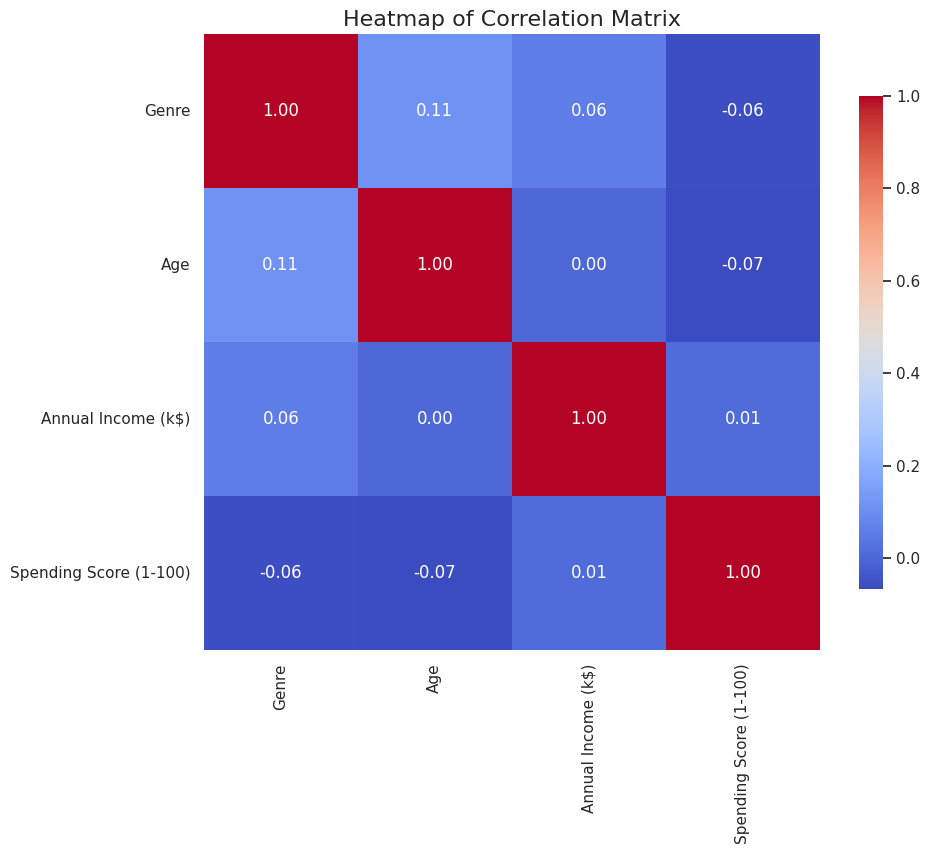

In [21]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap of Correlation Matrix', fontsize=16)
plt.show()

# **Ml Models**

> **KMeans**

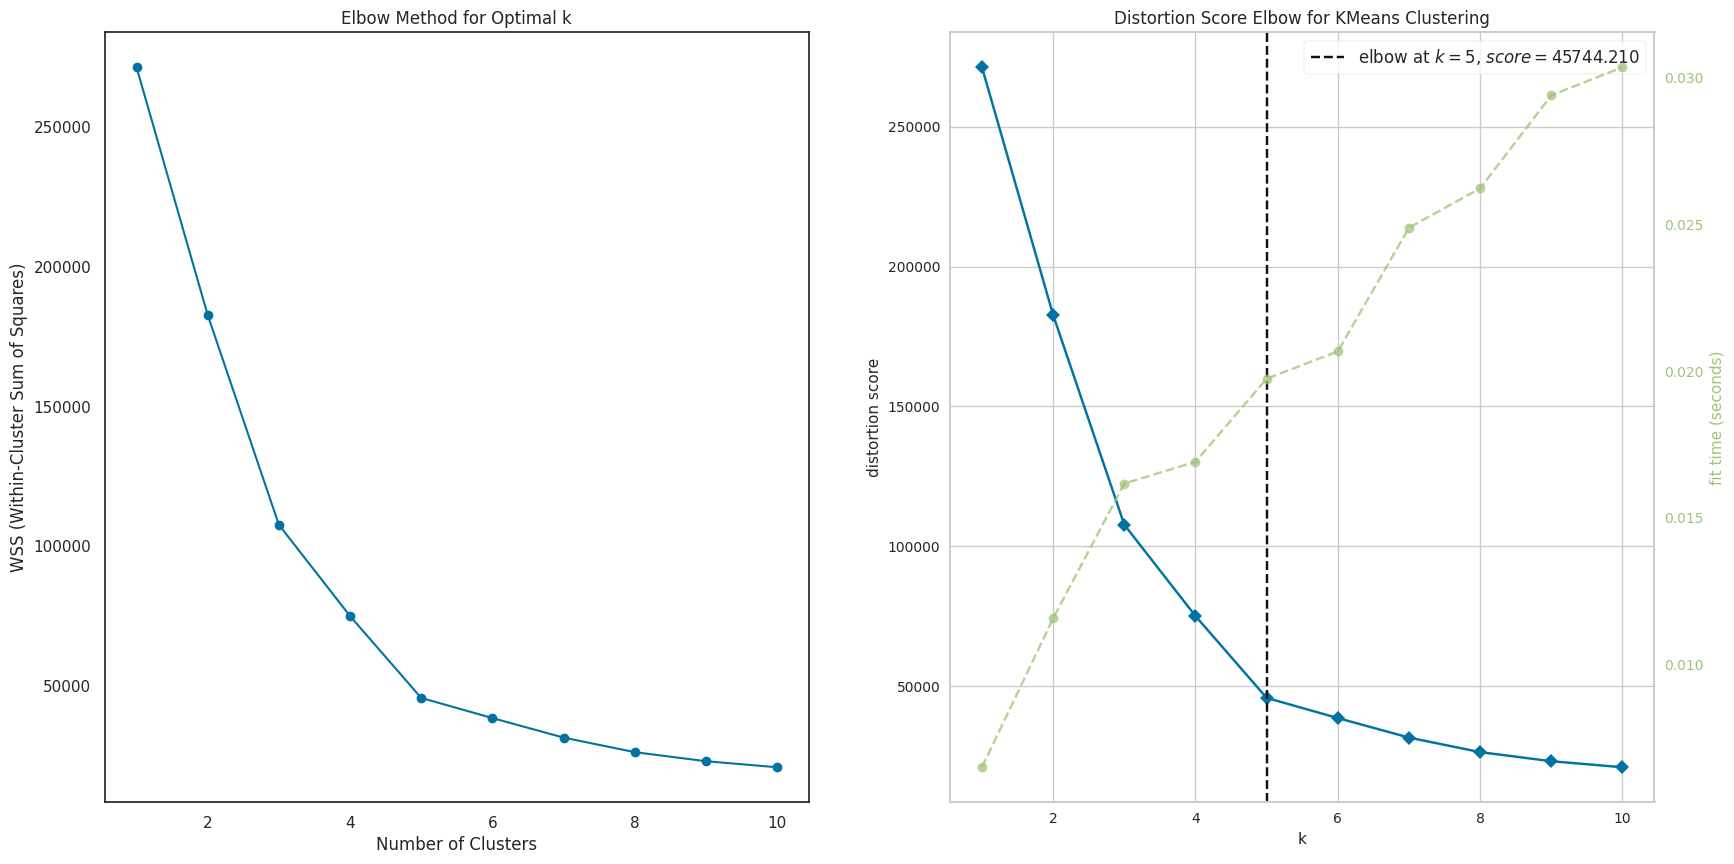

In [22]:
plt.figure(figsize=(20, 10))
wss=[]
for i in range(1,11):
    k_model=KMeans(n_clusters=i,init="k-means++",random_state=42)
    k_model.fit(data)
    wss.append(k_model.inertia_)
plt.subplot(1, 2,1)    
plt.plot(range(1,11),wss,"bo-")
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS (Within-Cluster Sum of Squares)')


from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(k_model, k=(1,11))
plt.subplot(1, 2,2)
visualizer.fit(data)
visualizer.show()
 
plt.show()

In [23]:
k_model=KMeans(n_clusters=5,init="k-means++",random_state=42)
labels=k_model.fit_predict(data)

In [24]:
set(labels)

{0, 1, 2, 3, 4}

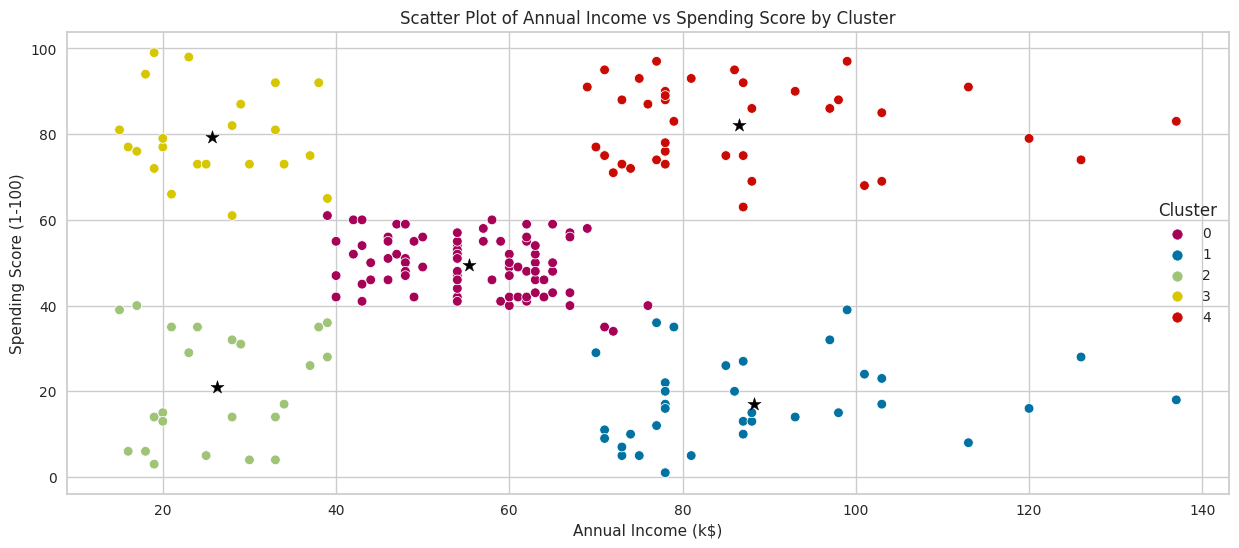

In [25]:
centroids = k_model.cluster_centers_
plt.figure(figsize=(15, 6))
sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)", hue=labels, palette=['m', 'b', 'g', 'y', 'r'])
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[2], centroid[3], marker='*', s=100, c='black')  
    plt.annotate(f'Centroid {i}', xy=(centroid[0], centroid[1]), 
                 xytext=(5, 5), textcoords='offset points', 
                 fontsize=12, color='black', weight='bold')
plt.title('Scatter Plot of Annual Income vs Spending Score by Cluster')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster', loc='best')  

plt.show()

# **Hierarchical clustering**

In [26]:
hc_model=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage='ward')
labels_1=hc_model.fit_predict(data)

In [27]:
set(labels)

{0, 1, 2, 3, 4}

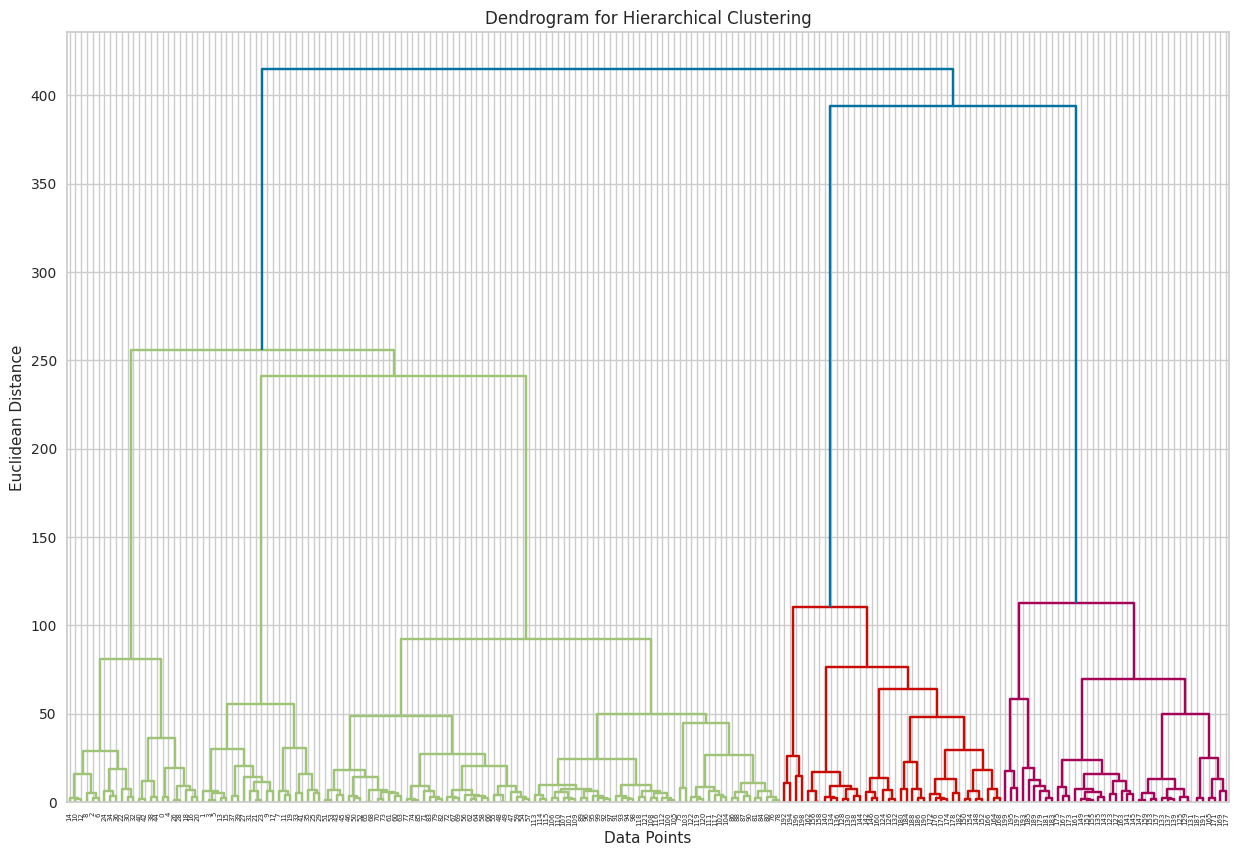

In [28]:
plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(sch.linkage(data, method='ward', metric='euclidean'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

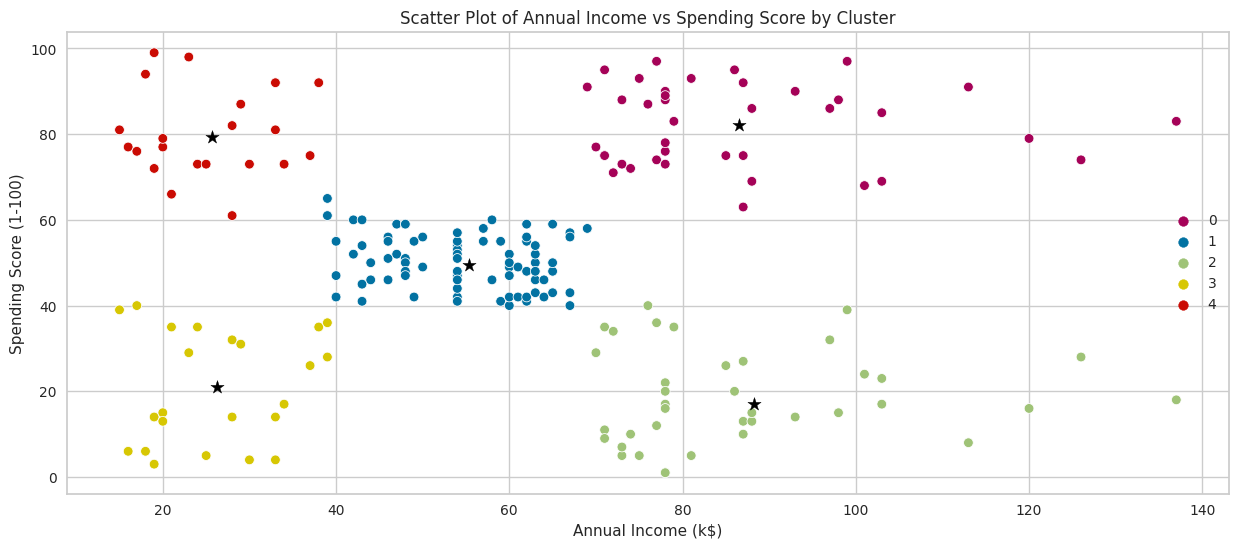

In [29]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)", hue=labels_1,palette=['m','b','g','y','r'])
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[2], centroid[3], marker='*', s=100, c='black')  
    plt.annotate(f'Centroid {i}', xy=(centroid[0], centroid[1]), 
                 xytext=(5, 5), textcoords='offset points', 
                 fontsize=12, color='black', weight='bold')
plt.title('Scatter Plot of Annual Income vs Spending Score by Cluster')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.show()


> **DBSCAN**

In [30]:
DB_model=DBSCAN(eps=5.5,min_samples=4)
DB_model.fit_predict(data)

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  2, -1,  2, -1,  2,  3,  2,  3,  2, -1,  2,  3,  2,
        3,  2,  3,  2,  3,  2, -1,  2,  3,  2, -1,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  2, -1,  2,  3,  2, -1, -1,  4,  2, -1, -1,
        4, -1,  4, -1,  4, -1,  4, -1,  4, -1, -1, -1,  4, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [31]:
labels_2=DB_model.labels_
set(labels_2)

{-1, 0, 1, 2, 3, 4}

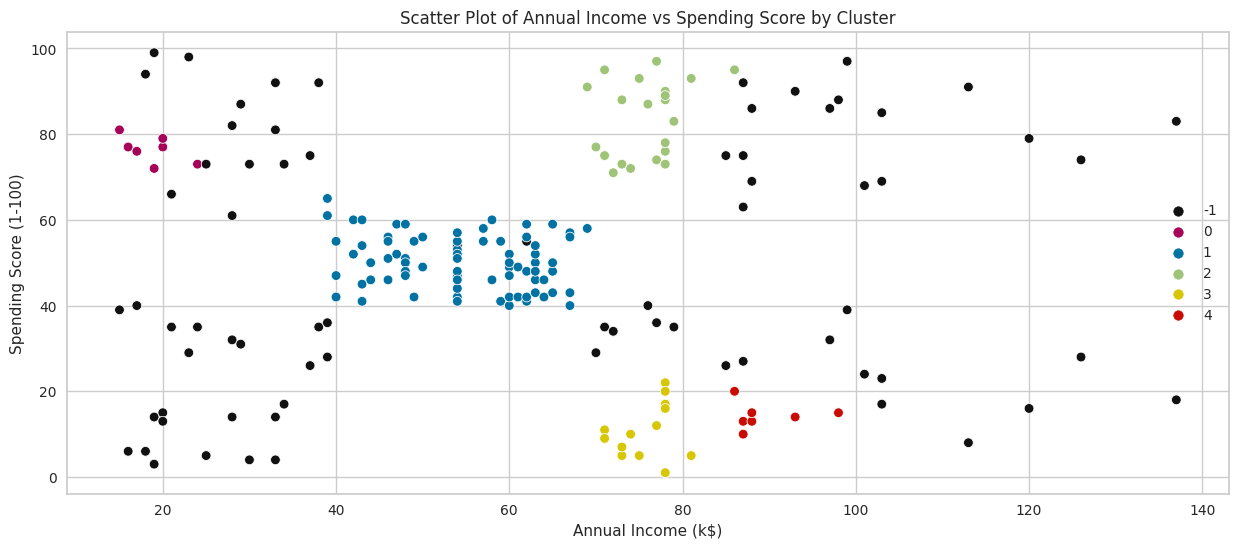

In [32]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)", hue=labels_2,palette=['k','m','b','g','y','r'])
plt.title('Scatter Plot of Annual Income vs Spending Score by Cluster')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.show()


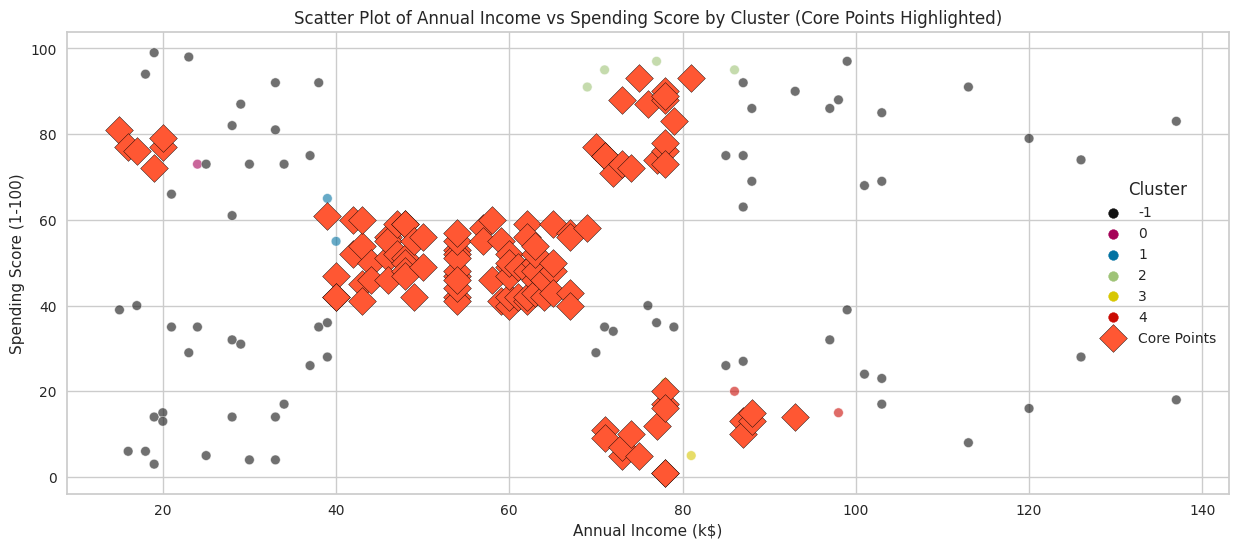

In [33]:

# Get core points
core_samples_mask = np.zeros_like(labels_2, dtype=bool)
core_samples_mask[DB_model.core_sample_indices_] = True

# Create the scatter plot
plt.figure(figsize=(15, 6))
sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)", hue=labels_2, palette=['k', 'm', 'b', 'g', 'y', 'r'], alpha=0.6)

# Highlight core points
plt.scatter(data.loc[core_samples_mask, "Annual Income (k$)"], 
            data.loc[core_samples_mask, "Spending Score (1-100)"], 
            marker='D', s=200, c='#FF5733', label='Core Points', edgecolor='black')  # Red diamond markers for core points

plt.title('Scatter Plot of Annual Income vs Spending Score by Cluster (Core Points Highlighted)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster', loc='best')  

plt.show()